Laser Simulation input (entry / exit points)

In [1]:
from larana.laser_sim import *
from larana.geom import Laser
from larana.lar_utils import make_figure, plot_edges
import matplotlib.pyplot as plt
from pprint import pprint
from root_numpy import array2root

run_number = 4

laser_id = 1
azimu_start = 35
azimu_end = -5
azimu_steps = 120
polar_start = 60
polar_end = 120
polar_steps = 15

# generation
laser_scan = generate_span(laser_id, azimu_start, azimu_end, azimu_steps, polar_start, polar_end, polar_steps)
uboone_directions = [convert_to_uboone(azi, pol, r, laser_id) for azi, pol, r in laser_scan]
inters = [get_tpc_intersection([120, 0, -35], direct) for direct in uboone_directions]

fig, ax = make_figure()

for intrsec in inters:
    plot_edges(ax, intrsec[0], intrsec[1])

plt.show()

ImportError: No module named 'ROOT'

In [38]:
%matplotlib qt

Laser Data after larsoft processing

In [10]:
import larana.lar_data as lard

10


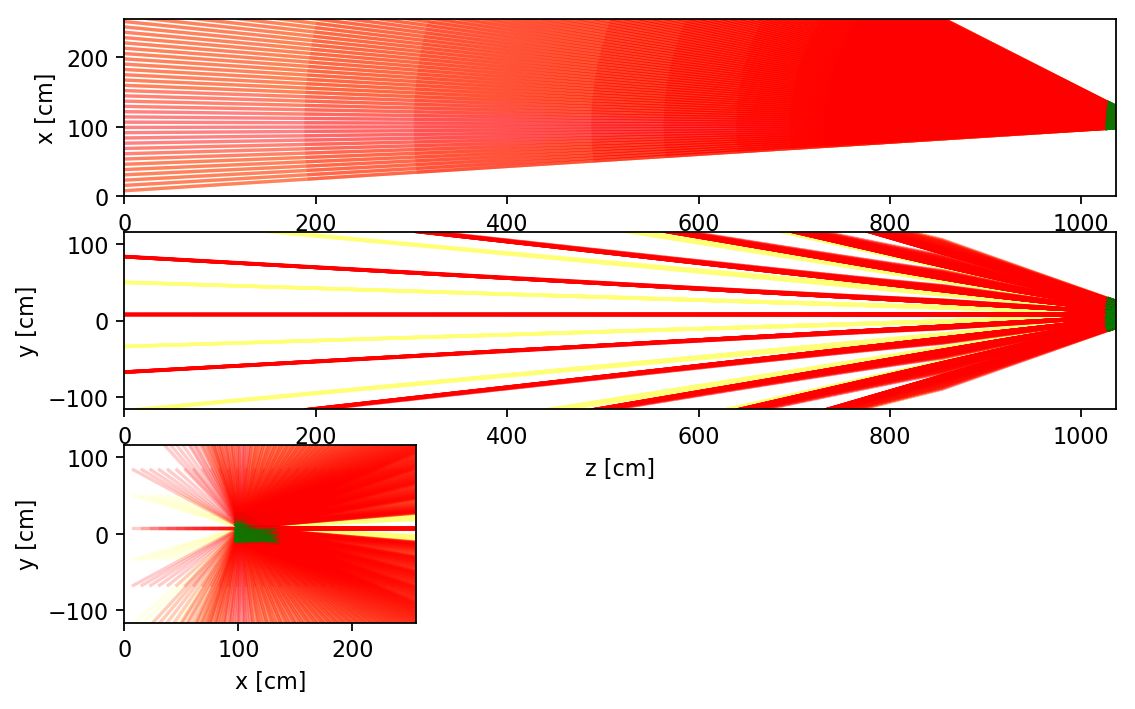

In [3]:

from larana.lar_utils import *
import matplotlib.pyplot as plt

laser_filename = "/home/matthias/workspace/laserana/python/utils/data/laser-data--test-calib-sim.npy"
laser_data = np.load(laser_filename)

slices = find_unique_polar_idx(laser_data)

print(len(slices))

colors = iter(cm.viridis(np.linspace(0,1,len(slices))))
fig, ax = make_figure()

for sl in slices:
    slice_color = next(colors)
    laser_slice = laser_data[sl]

    for laser in laser_slice:
        laser_entry, laser_exit, laser_dir, laser_pos = disassemble_laser(laser)
        
        kwargs = {'color': '#FFFF77', 'alpha': 0.2}
        
        plot_edges(ax, laser_entry.tolist(), laser_exit.tolist(), kwargs)

for intrsec, direc in zip(inters, uboone_directions):
    kwargs = {'color': 'r', 'alpha': 0.2}
    plot_edges(ax, intrsec[0], intrsec[1], kwargs)
    plot_edges(ax, intrsec[0], np.add(intrsec[0], np.multiply(10., direc)).tolist(), {'color': 'g'})

plt.show()